In [165]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from math import floor
plt.rcParams['text.usetex'] = True

### Tutorial 1: Question 2
We seek to solve the following non-linear boundary value problem
\begin{equation}
\frac{d^2\phi}{dr^2} + \frac{1}{r}\frac{d\phi}{dr} - \frac{n^2}{r^2}\phi + (1-\phi^2)\phi = 0, \quad \phi(0)=0, \quad \phi(\infty)=1
\end{equation}
where $n=1,2,\ldots$ is the vorticity using the shooting method.

In [166]:
a, b = [0.001, 7] # [start point, end point]
N = 100 # number of points
r = np.linspace(a, b, N+1) # space interval
tol = 10**(-6) # tolerance

The boundary value problem can be converted into an initial value problem of the form
\begin{equation}
\begin{cases}
\frac{d\phi}{dr}=\theta\\
\frac{d\theta}{dr}=-\frac{1}{r}\theta + \frac{n^2}{r^2}\phi - (1-\phi^2)\phi 
\end{cases}
\end{equation}
with boundary conditions
\begin{equation}
\phi(0)=0,\quad\phi'(0)=p
\end{equation}


In [167]:
def f(r, y, n=1):
    """returns the first order derivative"""
    return y[1], -(1/r)*y[1] + ((n**2)/(r**2))*y[0] - (1-y[0]**2)*y[0] 

for i in np.linspace(0.5, 1.5, 10):
    y0 = [0, i] # contains boundary condition and the initial derivative guess
    sol = solve_ivp(f, [a, b], y0, t_eval=r, args=(n,))
    y = sol.y[0,:] # declares only the values of y
    
    if y[-1] - 1 > 0:
        print('p={:.5f}, greater than'.format(i))
    elif y[-1] - 1 < 0:
        print('p={:.5f}, less than'.format(i))

p=0.50000, less than
p=0.61111, less than
p=0.72222, less than
p=0.83333, less than
p=0.94444, less than
p=1.05556, less than
p=1.16667, less than
p=1.27778, greater than
p=1.38889, greater than
p=1.50000, greater than


We observe that $p$ lies in the approximate interval $1.1\leq p \leq 1.3$. We can now implement the bisection method to find $p$ such that
\begin{equation}
|\phi_{n-1}-\phi_n|< \varepsilon
\end{equation}
where $\varepsilon$ is a set tolerance.

In [168]:
def shooting_method(p, r, n, tol=10**(-6)):
    pstart, pend = p
    n_iterations = 0

    while np.abs(pend - pstart) > tol:
        updated_p = (pend + pstart) / 2
        y0 = [0, updated_p]
        sol = solve_ivp(f, [a, b], y0, t_eval=r, args=(n,))
        y = sol.y[0, :]

        if y[-1] - 1 < 0:
            pstart = updated_p
        elif y[-1] - 1 > 0:
            pend = updated_p

        diff = np.abs(pend - pstart)
        n_iterations += 1

    return [y, n_iterations]

We can now plot the solution obtained by the shooting method.

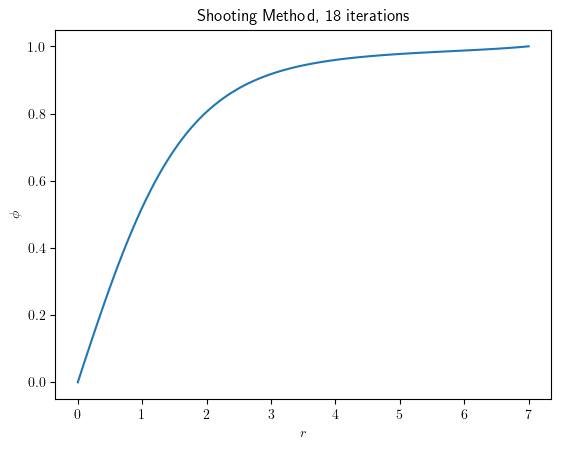

In [169]:
y, n_iterations = shooting_method([1.1, 1.3], r, 1)
plt.plot(r, y)
plt.xlabel(r'$r$')
plt.ylabel(r'$\phi$')
plt.title(r'Shooting Method, {} iterations'.format(n_iterations))
plt.show()

Further, we can see the effects of having an infinitely long interval

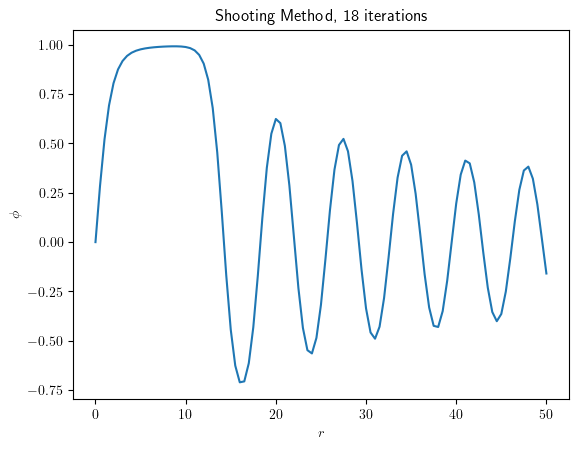

In [170]:
a, b = [0.001, 50] # [start point, end point]
N = 100 # number of points
r = np.linspace(a, b, N+1) # space interval
tol = 10**(-6) # tolerance

y, n_iterations = shooting_method([1.1, 1.3], r, 1)
plt.plot(r, y)
plt.xlabel(r'$r$')
plt.ylabel(r'$\phi$')
plt.title(r'Shooting Method, {} iterations'.format(n_iterations))
plt.show()